In [1]:
import os
from typing import Self

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
class Perceptron:
    """Perceptron classifier

    Parameters:
        eta: float
            Скорость обучения (0.0; 1.0)
        n_iter: int
            Кол-во эпох для обучения.
        random_state: int
            Зерно для генератора случайных чисел.

    Attributes:
        w_: 1d-array
            Веса перцептрона.
        b_: Scalar
            Смещение перцептрона.
        errors_: list[int]
            Кол-во ошибок классификации в каждой эпохе.
    """

    def __init__(self, eta: float, n_iter: int, random_state: int):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y) -> Self:
        """Обучение перцептрона.

        Args:
            X: {array-like}, shape = [n_examples, n_features]
                Массив признаков всех наблюдений обучающего набора, где
                n_examples - кол-во наблюдений,
                n_features - кол-во признаков у образца.
            y: {array-like}, shape = [n_examples]
                Набор меток признаков.

        Returns:
            object: Self
        """
        rgen = np.random.RandomState(self.random_state)

        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)

        self.errors_: list[int] = []

        for _ in range(self.n_iter):
            errors = 0

            for x_i, target in zip(X, y):
                prediction = self.predict(x_i)
                update = (target - prediction) * self.eta

                self.w_ += update * x_i
                self.b_ += update

                errors += int(target != prediction)

            self.errors_.append(errors)

        return self

    def predict(self, X) -> np.ndarray:
        """Получение прогнозируемой метки.

        Args:
            X: {array-like}, shape = [n_features]
                Признаки наблюдения.

        Returns:
            int: binary class target.
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def net_input(self, X) -> float:
        """Получение фактического ввода.

        Args:
            X: {array-like}, shape = [n_features]
                Признаки наблюдения.

        Returns:
            float: значение фактического ввода.
        """
        return np.dot(X, self.w_) + self.b_


In [3]:
dataset_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)

df: pd.DataFrame = pd.read_csv(dataset_url, header=None, encoding="utf-8")

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
y = df.iloc[:100, 4].to_numpy()
y = np.where(y == "Iris-setosa", 0, 1)

X = df.iloc[:100, [0, 2]].to_numpy()

print(f"y = {y[:5]}", "\n")
print(f"X = {X[:5, :]}")

y = [0 0 0 0 0] 

X = [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


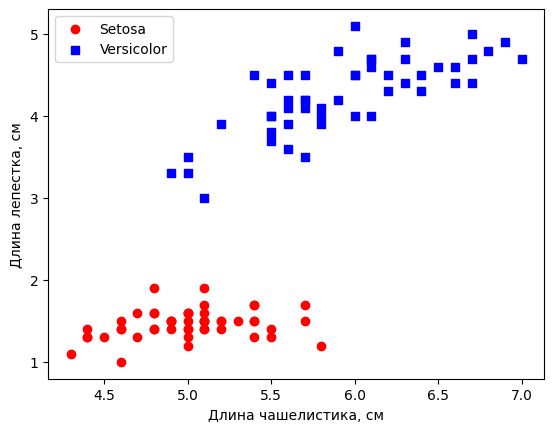

In [5]:
plt.scatter(X[:50, 0], X[:50, 1], marker="o", color="red", label="Setosa")
plt.scatter(X[50:, 0], X[50:, 1], marker="s", color="blue", label="Versicolor")

plt.xlabel("Длина чашелистика, см")
plt.ylabel("Длина лепестка, см")
plt.legend(loc="upper left")

plt.show()

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10, random_state=1)
ppn.fit(X, y)

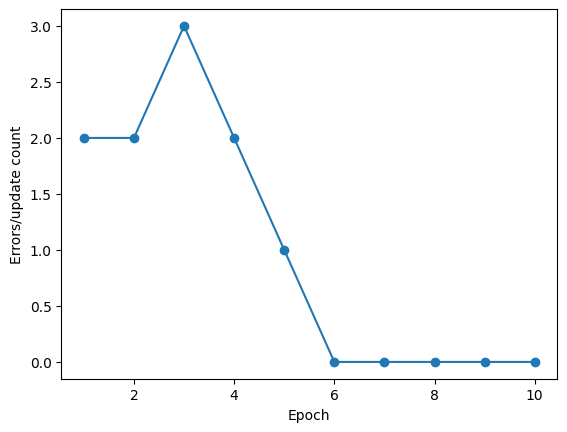

In [7]:
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Errors/update count")
plt.show()

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(lab.shape)

    lab = lab.reshape(xx1.shape)
    print(lab.shape)

    plt.contour(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black",
        )

    plt.xlabel("Длина чашелистника, см")
    plt.ylabel("Длина лепестка, см")
    plt.legend(loc="upper left")
    # plt.savefig("./perceptron.png")
    plt.show()

(71675,)
(305, 235)


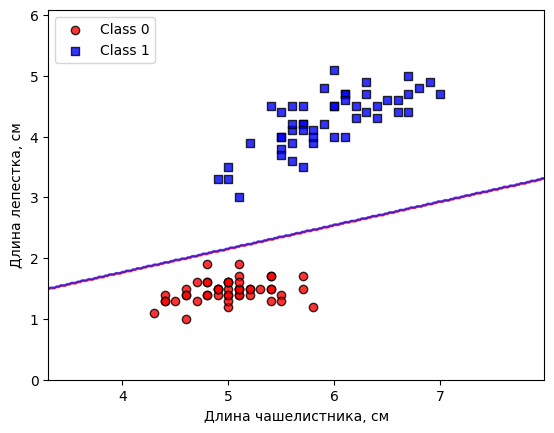

In [9]:
plot_decision_regions(X, y, ppn)

* Рассмотреть причину, по которой веса коэффицентов заполняются именно небольшими случайными величинами, а не нолями.

* Попробовать создать мультиклассовую прогностическую модель из Перцептрона с помощью метода One versus All (OvA)


In [10]:
# OvA
# K-fold Cross-Validation
folds_cnt = 5
folds = list()

for i in range(folds_cnt):
    feature_idx = [0, 1, 2, 3]

    setosa_x_i = df.iloc[(i * 10) : ((i + 1) * 10), feature_idx]
    setosa_y_i = df.iloc[(i * 10) : ((i + 1) * 10), 4]

    versicolor_x_i = df.iloc[(i * 10 + 50) : ((i + 1) * 10 + 50), feature_idx]
    versicolor_y_i = df.iloc[(i * 10 + 50) : ((i + 1) * 10 + 50), 4]

    virginica_x_i = df.iloc[(i * 10 + 100) : ((i + 1) * 10 + 100), feature_idx]
    virginica_y_i = df.iloc[(i * 10 + 100) : ((i + 1) * 10 + 100), 4]

    i_fold_x = pd.concat([setosa_x_i, versicolor_x_i, virginica_x_i])
    i_fold_y = pd.concat([setosa_y_i, versicolor_y_i, virginica_y_i])

    folds.append((i_fold_x.to_numpy(), i_fold_y.to_numpy()))


In [11]:
markers = df.iloc[:, 4].unique()

markers

<StringArray>
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Length: 3, dtype: str

In [12]:
all_folds_accuracy = list()

for i in range(folds_cnt):
    test_fold = folds[i]

    training_folds = folds[0:i] + folds[(i + 1) :]

    X_test = test_fold[0]
    y_test = test_fold[1]

    X_train = np.concatenate([fold[0] for fold in training_folds])
    y_train = np.concatenate([fold[1] for fold in training_folds])

    perceptrons = list()

    for marker in markers:
        X = X_train.copy()
        y = np.where(y_train.copy() == marker, 1, 0)

        perceptrons.append(
            Perceptron(
                eta=0.00001,
                n_iter=80,
                random_state=1,
            ).fit(X, y)
        )

    errors = 0

    for X, y in zip(X_test, y_test):
        perceptrons_net_input = [p.net_input(X) for p in perceptrons]
        max_input = max(perceptrons_net_input)
        max_input_index = perceptrons_net_input.index(max_input)
        if markers[max_input_index] != y:
            errors += 1

    current_accuracy = errors / len(y_test)
    all_folds_accuracy.append(current_accuracy)
    print(f"k = {i}, current accuracy: {current_accuracy}")


cross_validate_accuracy = sum(all_folds_accuracy) / len(all_folds_accuracy)
print(f"Cross-validate accuracy = {cross_validate_accuracy}")

k = 0, current accuracy: 0.03333333333333333
k = 1, current accuracy: 0.1
k = 2, current accuracy: 0.13333333333333333
k = 3, current accuracy: 0.06666666666666667
k = 4, current accuracy: 0.23333333333333334
Cross-validate accuracy = 0.11333333333333333


### Визуализация зависимости Cross-validate accuracy от гиперпараметров


In [13]:
RANDOM_STATE = 1


def get_cross_validate_accuracy(eta, n_iter) -> float:
    all_folds_accuracy = list()

    for i in range(folds_cnt):
        test_fold = folds[i]

        training_folds = folds[0:i] + folds[(i + 1) :]

        X_test = test_fold[0]
        y_test = test_fold[1]

        X_train = np.concatenate([fold[0] for fold in training_folds])
        y_train = np.concatenate([fold[1] for fold in training_folds])

        perceptrons = list()

        for marker in markers:
            X = X_train
            y = np.where(y_train == marker, 1, 0)

            perceptrons.append(
                Perceptron(
                    eta=eta,
                    n_iter=n_iter,
                    random_state=RANDOM_STATE,
                ).fit(X, y)
            )

        errors = 0

        for X, y in zip(X_test, y_test):
            perceptrons_net_input = [p.net_input(X) for p in perceptrons]
            max_input = max(perceptrons_net_input)
            max_input_index = perceptrons_net_input.index(max_input)
            if markers[max_input_index] != y:
                errors += 1

        current_accuracy = errors / len(y_test)
        all_folds_accuracy.append(current_accuracy)

    return (sum(all_folds_accuracy) / len(all_folds_accuracy)) * 100

Генерация данных для сетки


In [14]:
learning_rates = np.logspace(-6, 0, 50)
iterations = np.arange(10, 200, 10)

X, Y = np.meshgrid(learning_rates, iterations)
Z = np.zeros((len(iterations), len(learning_rates)))

for i, epochs in enumerate(iterations):
    for j, eta in enumerate(learning_rates):
        Z[i, j] = get_cross_validate_accuracy(eta, epochs)


Рендер графика


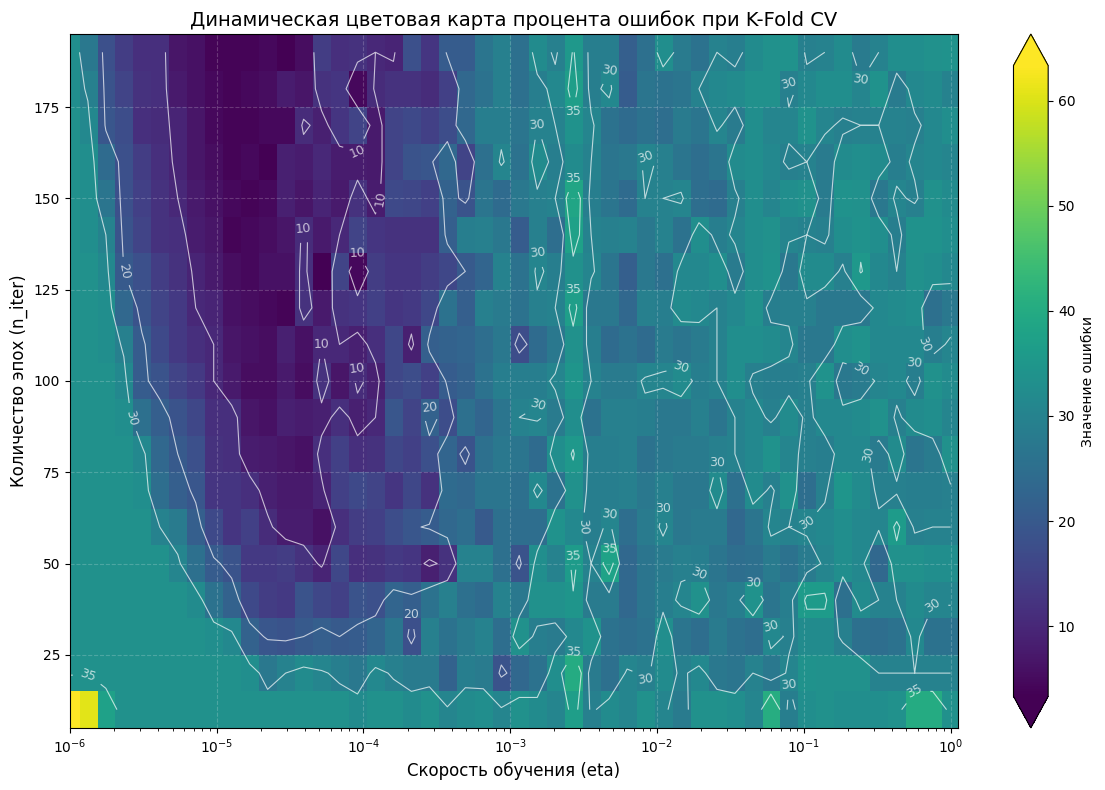

In [15]:
plt.figure(figsize=(12, 8))

# cmap = ["viridis", "hot", "plasma"]
# '_r' - reverse cmap
mesh = plt.pcolormesh(X, Y, Z, cmap="viridis", shading="auto")

cbar = plt.colorbar(mesh, label="Значение ошибки", extend="both")
plt.xscale("log")
plt.xlabel("Скорость обучения (eta)", fontsize=12)
plt.ylabel("Количество эпох (n_iter)", fontsize=12)
plt.title(
    "Динамическая цветовая карта процента ошибок при K-Fold CV",
    fontsize=14,
)

# Изолинии
contour = plt.contour(
    X,
    Y,
    Z,
    levels=[10, 20, 30, 35],
    colors="white",
    linewidths=0.8,
    alpha=0.7,
)
plt.clabel(contour, inline=True, fontsize=9, fmt="%.0f")

plt.grid(True, alpha=0.2, color="white", linestyle="--")
plt.tight_layout()
plt.show()


Отлавливаем гиперпараметры минимального процента ошибки


In [ ]:
m = min(Z.ravel())

for i, row in enumerate(Z):
    for j, value in enumerate(row):
        if value <= m:
            print(
                f"min. error percent: {m}, n_iter = {iterations[i]}, eta = {learning_rates[j]}"
            )

min. error percent: 3.3333333333333335, n_iter = 130, eta = 5.1794746792312125e-05
min. error percent: 3.3333333333333335, n_iter = 190, eta = 2.94705170255181e-05
